In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
df = pd.read_csv('/content/gdrive/MyDrive/Copy of heart_failure_clinical_records_dataset.csv')

In [7]:
df.head(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1


In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

1.What is the distribution of age among heart failure patients in the dataset


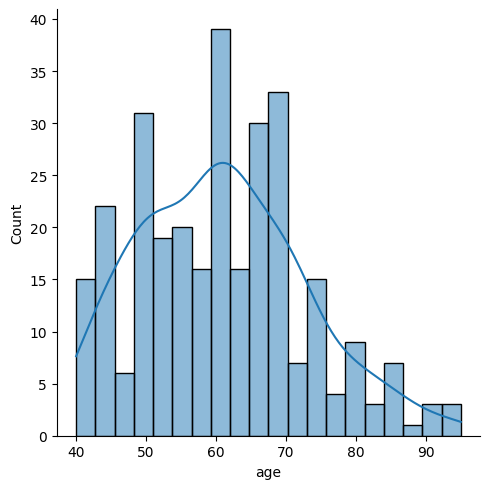

In [9]:
data = df['age']
sns.displot(data,kde = True,bins = 20)

 2.How does the death rate vary with age
 --->> Maximum death age range  = 50-75 yrs

<Axes: xlabel='age', ylabel='Count'>

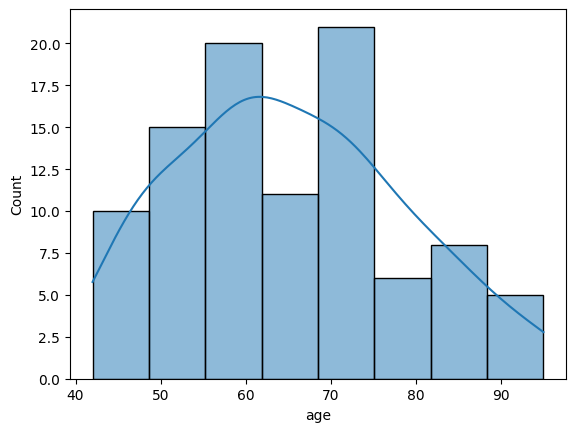

In [18]:
Death_events = df[df.DEATH_EVENT == 1]
sns.histplot(Death_events,x = 'age',kde = 1)

3.What is the percentage of male and female patients in the dataset?
-->> Male - 64.88% and Female 35.11%

In [23]:
df.sex.value_counts(normalize=True)

sex
1    0.648829
0    0.351171
Name: proportion, dtype: float64

4. How does the platelet counts vary among the different age groups?

In [37]:
#Creating age groups column
df['age_groups'] = pd.cut(df['age'], bins =[40,50,60,70,80,90,100], labels = ['40-50','50-60','60-70','70-80','80-90','90-100'])

<Axes: xlabel='age_groups', ylabel='platelets'>

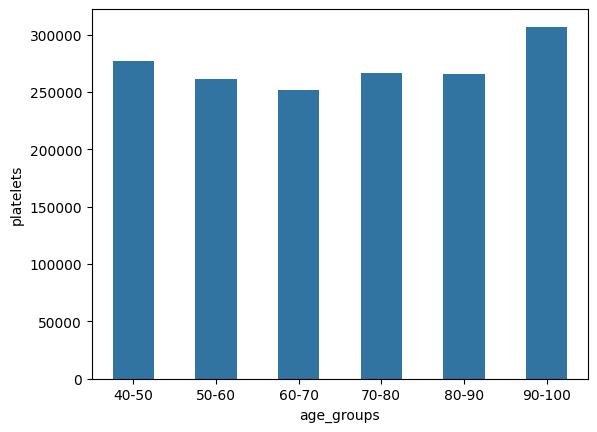

In [57]:
#plotting bar graph for agewise platelets average
age_group_table = df.groupby('age_groups')['platelets'].mean()
sns.barplot(age_group_table,width = 0.5)

5. Is there a corelation between createinine and sodium levels in the blood? -->> Graph shows neglesible correlation

<Axes: >

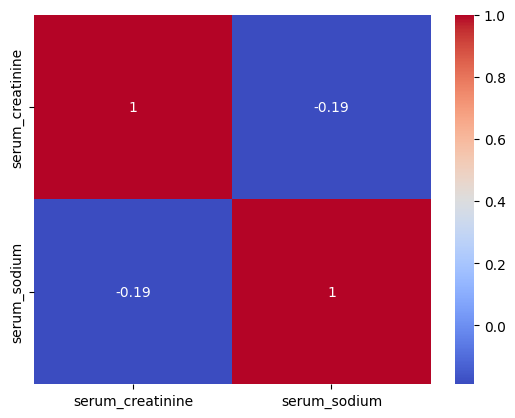

In [63]:
sns.heatmap(df[['serum_creatinine','serum_sodium']].corr(), annot = True,fmt='.2g',cmap= 'coolwarm')

6. How does the prevalence of high blood pressure differ between male and female patients??

<Axes: xlabel='sex', ylabel='count'>

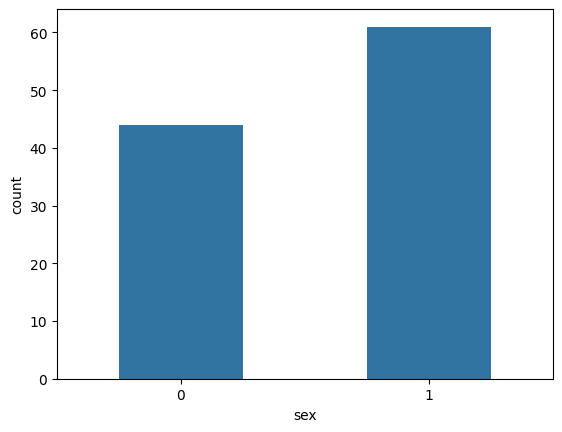

In [83]:
high_blood_pressure_data = df[df['high_blood_pressure']==1]
sns.barplot(high_blood_pressure_data.sex.value_counts(),width = 0.5)

7. What is the relationship between smoking habits and occurance of heart failure??

<Axes: >

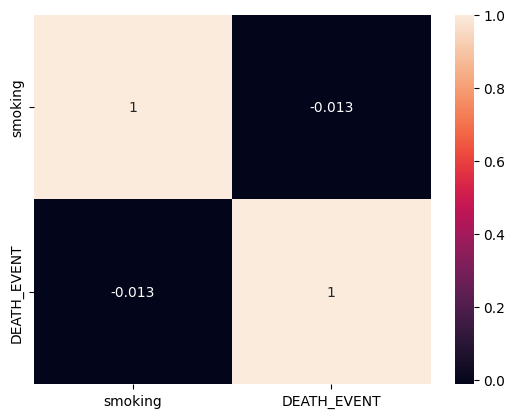

In [92]:
sns.heatmap(df[['smoking','DEATH_EVENT']].corr(), annot = True,fmt='.2g')

8. Are there any noticiable pattern in the distribution of deth events across different age groups?? -->> Major deth rate in age range 40-70

<Axes: xlabel='age_groups', ylabel='DEATH_EVENT'>

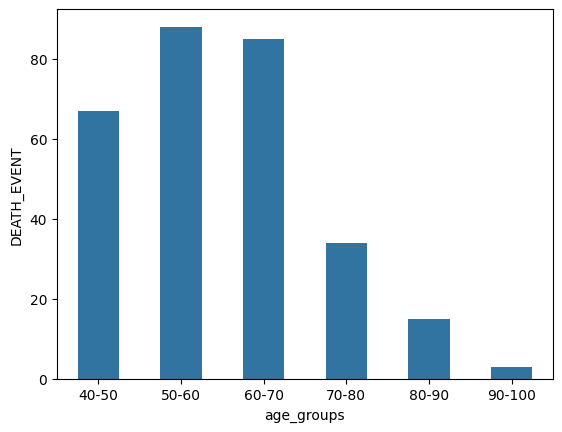

In [95]:
age_group_table_for_deth = df.groupby('age_groups')['DEATH_EVENT'].count()
sns.barplot(age_group_table_for_deth,width = 0.5)

9.is there any significance difference in ejection fraction between patients with and without diabetese??

In [96]:
df.ejection_fraction.unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70])

<Axes: xlabel='ejection_fraction', ylabel='count'>

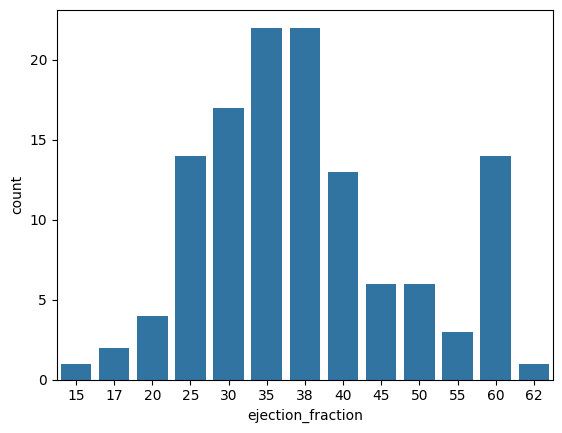

In [106]:
diabetes_patient_data = df[df['diabetes']==1]
sns.barplot(diabetes_patient_data.ejection_fraction.value_counts() )

10. How does the serum creatinine level vary betweeen patient who survived and those who did not? -->> Average level of serum creatinine level found high those who did not survived

<Axes: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

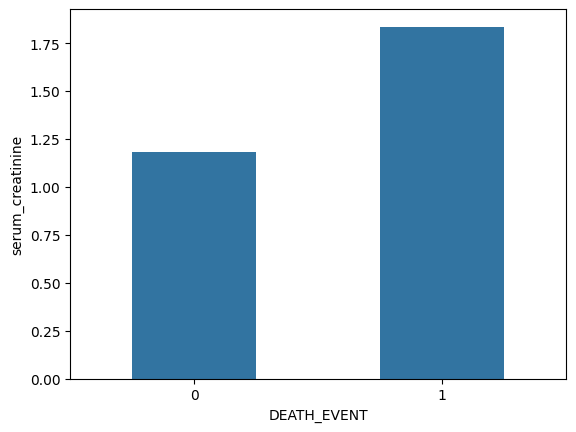

In [114]:
serum_creatinine_table = df.groupby('DEATH_EVENT')['serum_creatinine'].mean()
sns.barplot(serum_creatinine_table,width = 0.5)